In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

# The following plots are the results after running the GMM model. All the boxplots were made to name each cluster and identify a certain type of player 

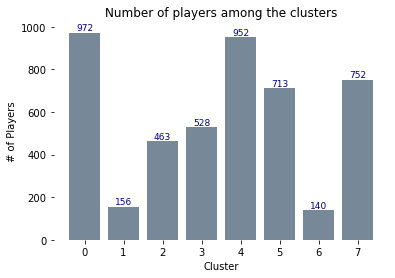

In [2]:
labels_df=pd.read_csv('Labels for 8 clusters.csv')  #Labels obtained from the GMM model. 
#Bars plot showing the amount of players in each cluster.
plt.figure()
counts=labels_df['labels'].value_counts().sort_index()
bars=plt.bar(counts.index,counts,align='center',color='lightslategrey')
plt.xlabel('Cluster')
plt.ylabel('# of Players')
plt.title('Number of players among the clusters',alpha=1)
plt.xticks(np.arange(0,8,1),rotation=0)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()+10, str(int(bar.get_height())), 
                 ha='center', color='darkblue', fontsize=9)
#plt.savefig('Distribution for 8 clusters.jpg')

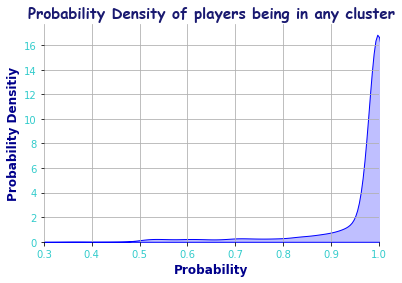

In [3]:
#Probability density function of the players being in a cluster.
labels_max=labels_df.drop(['labels','Unnamed: 0'],axis=1)
labels_max['max_prob'] = labels_max.max(axis=1)
sn.kdeplot(labels_max['max_prob'], color="blue", fill=True)
plt.title('Probability Density of players being in any cluster',size=15,fontname="comic sans ms",
          fontweight='bold',color='midnightblue')
plt.xlabel('Probability',size=12,fontweight='bold',color='darkblue')
plt.ylabel('Probability Densitiy',size=12,fontweight='bold',color='darkblue')
plt.xlim((0.3,1))
plt.xticks(color='c',alpha=0.8)
plt.yticks(color='c',alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid()
plt.savefig('distribution of probs.jpg')

In [4]:
cluster_data = pd.read_csv('Data_2009_2019.csv')
cluster_data = cluster_data[cluster_data['GP'] >=20]
cluster_data=cluster_data.set_index(['Player','Tm','GP'])
cluster_data=cluster_data.drop('Unnamed: 0',axis=1)

In [5]:
#Standarize all data to plot the main characteristics of each cluster. 
X_scaled=StandardScaler().fit_transform(cluster_data)
cluster_scaled=pd.DataFrame(X_scaled,columns=['FGA', '3P%', '2P%', 'FT%', 'PTS', 'Height', 'PER', '3PAr', 'FTr','ORB%', 'DRB%',
                            'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '0-3ft','3-10ft', '2P(%FG AST)', '3P(%FG AST)',
                            '%FGA(DUNKS)', '%3PA(CORNERS)','10-3P'])
cluster_scaled['labels']=labels_df['labels']   #Add a new column with the labels. 

In [6]:
#Most important characteristics for cluster 0
cl_0=cluster_scaled[cluster_scaled['labels']==0]

tt=(cl_0['3P%'],cl_0['3P(%FG AST)'],cl_0['2P(%FG AST)'],
    cl_0['PER'],cl_0['FTr'],cl_0['ORB%'],cl_0['AST%'],cl_0['BLK%'],cl_0['TOV%'],cl_0['3-10ft'])

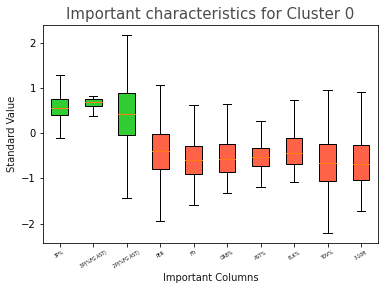

In [7]:
#Boxplot for important characteristics without outliers in cluster 0
plt_0=plt.boxplot(tt,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,11,1),['3P%','3P(%FG AST)','2P(%FG AST)','PER','FTr','ORB%','AST%','BLK%','TOV%','3-10ft'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 0',size=15,alpha=0.7)

colors = ['limegreen','limegreen','limegreen','tomato','tomato','tomato','tomato','tomato','tomato','tomato']

for patch,color in zip(plt_0['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

In [8]:
#Most important characteristics for cluster 1
cl_1=cluster_scaled[cluster_scaled['labels']==1]

tt1=(cl_1['Height'],cl_1['ORB%'],cl_1['DRB%'],cl_1['BLK%'],cl_1['2P(%FG AST)'],
     cl_1['3PAr'],cl_1['3P%'],cl_1['AST%'])

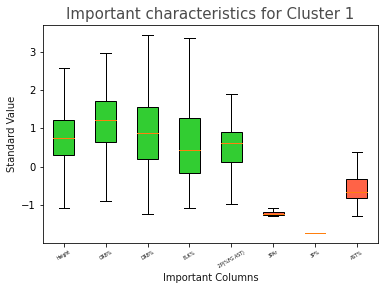

In [9]:
#Boxplot for important characteristics without outliers in cluster 1
plt_1=plt.boxplot(tt1,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,9,1),['Height','ORB%','DRB%','BLK%','2P(%FG AST)','3PAr','3P%','AST%'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 1',size=15,alpha=0.7)

colors = ['limegreen','limegreen','limegreen','limegreen','limegreen','tomato','tomato','tomato']

for patch,color in zip(plt_1['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

In [10]:
#Most important characteristics for cluster 2
cl_2=cluster_scaled[cluster_scaled['labels']==2]

tt2=(cl_2['FGA'],cl_2['PTS'],cl_2['PER'],cl_2['3P%'],cl_2['3P(%FG AST)'],cl_2['USG%'],cl_2['Height'],
     cl_2['3PAr'])

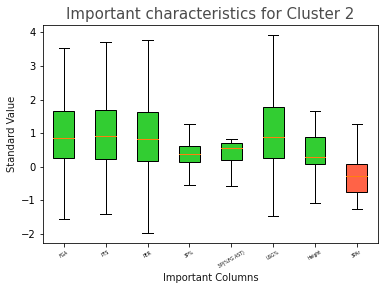

In [11]:
#Boxplot for important characteristics without outliers in cluster 2
plt_2=plt.boxplot(tt2,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,9,1),['FGA','PTS','PER','3P%','3P(%FG AST)','USG%','Height','3PAr'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 2',size=15,alpha=0.7)

colors = ['limegreen','limegreen','limegreen','limegreen','limegreen','limegreen','limegreen','tomato']

for patch,color in zip(plt_2['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

In [12]:
#Most important characteristics for cluster 3
cl_3=cluster_scaled[cluster_scaled['labels']==3]

tt3=(cl_3['3P%'],cl_3['3P(%FG AST)'],
     cl_3['PTS'],cl_3['Height'],cl_3['PER'],cl_3['ORB%'],cl_3['DRB%'],cl_3['%FGA(DUNKS)'],cl_3['BLK%'])

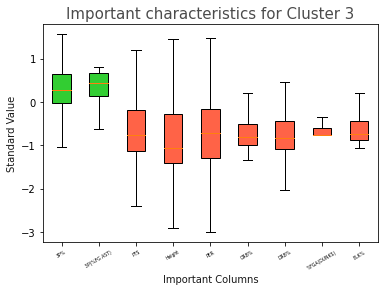

In [13]:
#Boxplot for important characteristics without outliers in cluster 3
plt_3=plt.boxplot(tt3,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,10,1),['3P%','3P(%FG AST)','PTS','Height','PER','ORB%','DRB%','%FGA(DUNKS)','BLK%'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 3',size=15,alpha=0.7)

colors = ['limegreen','limegreen','tomato','tomato','tomato','tomato','tomato','tomato','tomato']

for patch,color in zip(plt_3['boxes'],colors):
    patch.set_facecolor(color)

plt.show()

In [14]:
#Most important characteristics for cluster 4
cl_4=cluster_scaled[cluster_scaled['labels']==4]

tt4=(cl_4['3P%'],cl_4['FT%'],cl_4['3PAr'],cl_4['PTS'],cl_4['AST%'],cl_4['USG%'],
     cl_4['Height'],cl_4['ORB%'],cl_4['DRB%'],cl_4['2P(%FG AST)'],cl_4['BLK%'],cl_4['%FGA(DUNKS)'])

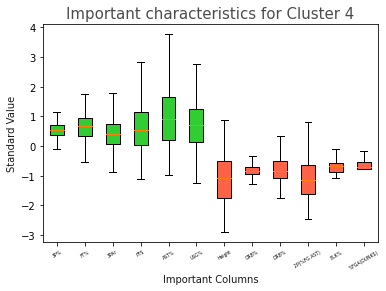

In [15]:
#Boxplot for important characteristics without outliers in cluster 4
plt_4=plt.boxplot(tt4,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,13,1),['3P%','FT%','3PAr','PTS','AST%','USG%','Height','ORB%','DRB%','2P(%FG AST)','BLK%','%FGA(DUNKS)'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 4',size=15,alpha=0.7)

colors = ['limegreen','limegreen','limegreen','limegreen','limegreen','limegreen',
          'tomato','tomato','tomato','tomato','tomato','tomato']

for patch,color in zip(plt_4['boxes'],colors):
    patch.set_facecolor(color)
    
plt.show()

In [16]:
#Most important characteristics for cluster 5
cl_5=cluster_scaled[cluster_scaled['labels']==5]

tt5=(cl_5['Height'],cl_5['3P(%FG AST)'],cl_5['AST%'])

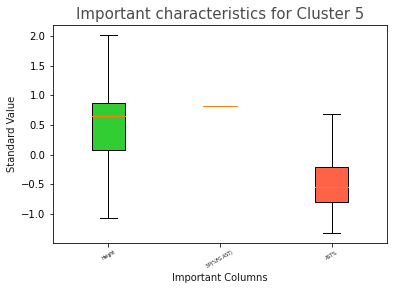

In [17]:
#Boxplot for important characteristics without outliers in cluster 5
plt_5=plt.boxplot(tt5,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,4,1),['Height','3P(%FG AST)','AST%'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 5',size=15,alpha=0.7)

colors = ['limegreen','limegreen','tomato']

for patch,color in zip(plt_5['boxes'],colors):
    patch.set_facecolor(color)
    
plt.show()

In [18]:
#Most important characteristics for cluster 6
cl_6=cluster_scaled[cluster_scaled['labels']==6]

tt6=(cl_6['2P(%FG AST)'],cl_6['AST%'],cl_6['FGA'],cl_6['3PAr'])

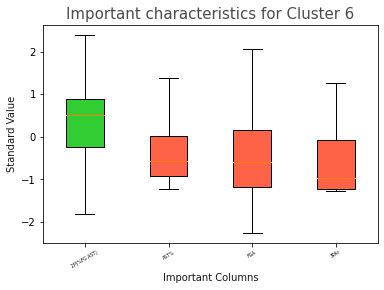

In [19]:
#Boxplot for important characteristics without outliers in cluster 6
plt_6=plt.boxplot(tt6,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,5,1),['2P(%FG AST)','AST%','FGA','3PAr'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 6',size=15,alpha=0.7)

colors = ['limegreen','tomato','tomato','tomato']

for patch,color in zip(plt_6['boxes'],colors):
    patch.set_facecolor(color)
    
plt.show()

In [20]:
#Most important characteristics for cluster 7
cl_7=cluster_scaled[cluster_scaled['labels']==7]

tt7=(cl_7['Height'],cl_7['ORB%'],cl_7['DRB%'],cl_7['0-3ft'],cl_7['2P(%FG AST)'],cl_7['%FGA(DUNKS)'],
     cl_7['FGA'],cl_7['AST%'],cl_7['3P(%FG AST)'],cl_7['%3PA(CORNERS)'])

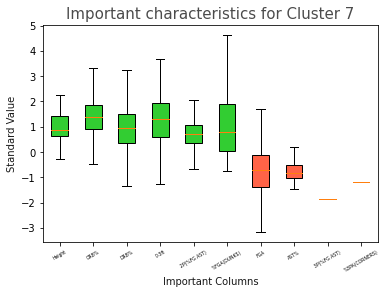

In [21]:
#Boxplot for important characteristics without outliers in cluster 7
plt_7=plt.boxplot(tt7,showfliers=False,patch_artist=True)
plt.xticks(np.arange(1,11,1),['Height','ORB%','DRB%','0-3ft','2P(%FG AST)','%FGA(DUNKS)','FGA','AST%','3P(%FG AST)','%3PA(CORNERS)'],rotation=30,size=4.5)
plt.ylabel('Standard Value',alpha=0.9)
plt.xlabel('Important Columns',alpha=0.9)
plt.title('Important characteristics for Cluster 7',size=15,alpha=0.7)

colors = ['limegreen','limegreen','limegreen','limegreen','limegreen','limegreen',
          'tomato','tomato','tomato','tomato']

for patch,color in zip(plt_7['boxes'],colors):
    patch.set_facecolor(color)
    
plt.show()

# Based on the article "NBA	Lineup	Analysis	on	Clustered	Player	Tendencies: A	new	approach	to	the	positions	of	basketball	& modeling	lineup	efficiency	of	soft	lineup	aggregates" I was able to name each cluster and type of player like this:

- cluster 0 = 3 Point Shooter
- cluster 1 = Mid-range Big
- cluster 2 = Dominant Scorer
- cluster 3 = Floor General
- cluster 4 = High Usage Guard
- cluster 5 = Skilled Forward
- cluster 6 = Versatile Role Player
- cluster 7 = Center
